#Передбачення ціни авто за його характеристиками



# Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях. Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти бібліотек



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices


from google.colab import drive

In [ ]:
#Формат ноутбука
pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

#Функції

In [ ]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = mean_squared_error(targets, predictions, squared=False)
  print('Loss:', loss)
  return model

# Знайомство з даними

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/ML/DATA/cars.csv')

In [ ]:
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


##Огляд даних за колонками

In [ ]:
#назви колонок
df.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
# типи даних колонок даних
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [ ]:
#перевірити чи fuel_type доцільно робити категоріальною
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [ ]:
#міняємо тип
df['Fuel_Type'] = df['Fuel_Type'].astype('category')

In [ ]:
#перевірити чи Transmission доцільно робити категоріальною
df.Transmission.value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [ ]:
#міняємо тип
df['Transmission'] = df['Transmission'].astype('category')

In [ ]:
#перевірити чи Owner_Type доцільно робити категоріальною
df.Owner_Type.value_counts()

Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64

In [ ]:
#міняємо
df['Owner_Type'] = df['Owner_Type'].astype('category')

In [ ]:
df.dtypes

Car_ID                  int64
Brand                  object
Model                  object
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage                 int64
Engine                  int64
Power                   int64
Seats                   int64
Price                   int64
dtype: object

In [ ]:
df.shape

(100, 13)

In [ ]:
df.select_dtypes(include = ['object', 'category']).columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [ ]:
len(df.select_dtypes(include = ['object', 'category']).columns)

5

In [ ]:
df.select_dtypes(include = "number").columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [ ]:
len(df.select_dtypes(include = "number").columns)

8

###**Висновки**
В наборі даних 7 числових і 6 категоріальних колонок з них:
1. Категоріальні:
  - 2 бінарні (мають лише 2 значення): Fuel_Type, Transmission;
  - 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
  - 1 колонкa, в яких можна встановити відношення порядку (Owner_Type).
2. Числові, з них:
  - 6 колонок, в яких можна встановити відношення порядку (Year, Mileage, Engine, Seats, Kilometers_Driven, Power)



#Попередня обробка даних

##Поділ даних на тренувальний та тестовий набори

In [ ]:
input_cols = ['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',]
inputs = df[input_cols]
targets = df['Price']

In [ ]:
targets.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Price
Non-Null Count  Dtype
--------------  -----
100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

In [ ]:
X_train = inputs_train
X_test = inputs_test
T_train = targets_train
T_test = targets_test

In [ ]:
T_train.info()

<class 'pandas.core.series.Series'>
Index: 80 entries, 83 to 75
Series name: Price
Non-Null Count  Dtype
--------------  -----
80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


##Кодування категоріальних колонок

#### Fuel_Type

In [ ]:
X_train.Fuel_Type.value_counts()

Fuel_Type
Petrol    41
Diesel    39
Name: count, dtype: int64

In [ ]:
fuel_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_cod'] = X_train.Fuel_Type.map(fuel_codes)

#### Transmission

In [ ]:
X_train.Transmission.value_counts()

Transmission
Automatic    49
Manual       31
Name: count, dtype: int64

In [ ]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_cod'] = X_train.Transmission.map(Transmission_codes)

###Brand

In [ ]:
X_train.Brand.unique()

array(['Volkswagen', 'Audi', 'Mercedes', 'Tata', 'Mahindra', 'Maruti',
       'BMW', 'Ford', 'Toyota', 'Honda', 'Hyundai'], dtype=object)

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])

OneHotEncoder()

In [ ]:
one_hot = enc.transform(X_train[['Brand']]).toarray()

In [ ]:
X_train[enc.categories_[0]] = one_hot

In [ ]:
X_train.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_cod,Transmission_cod,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [ ]:
one_hot_1 = enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]] = one_hot_1

In [ ]:
X_test.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Owner_Type

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_cod,Transmission_cod,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00


(None, None)

##Кореляційна матриця для числових даних

In [ ]:
#Обираю тільки числові стовпці
X_train_n = X_train.select_dtypes(include = "number")

#об'єднуємо числовий тренувальний датасет  та робимо кореляційний набір
XY_tr_n = pd.concat([X_train_n, T_train], axis=1)
corr_XY_tr_n = XY_tr_n.corr()

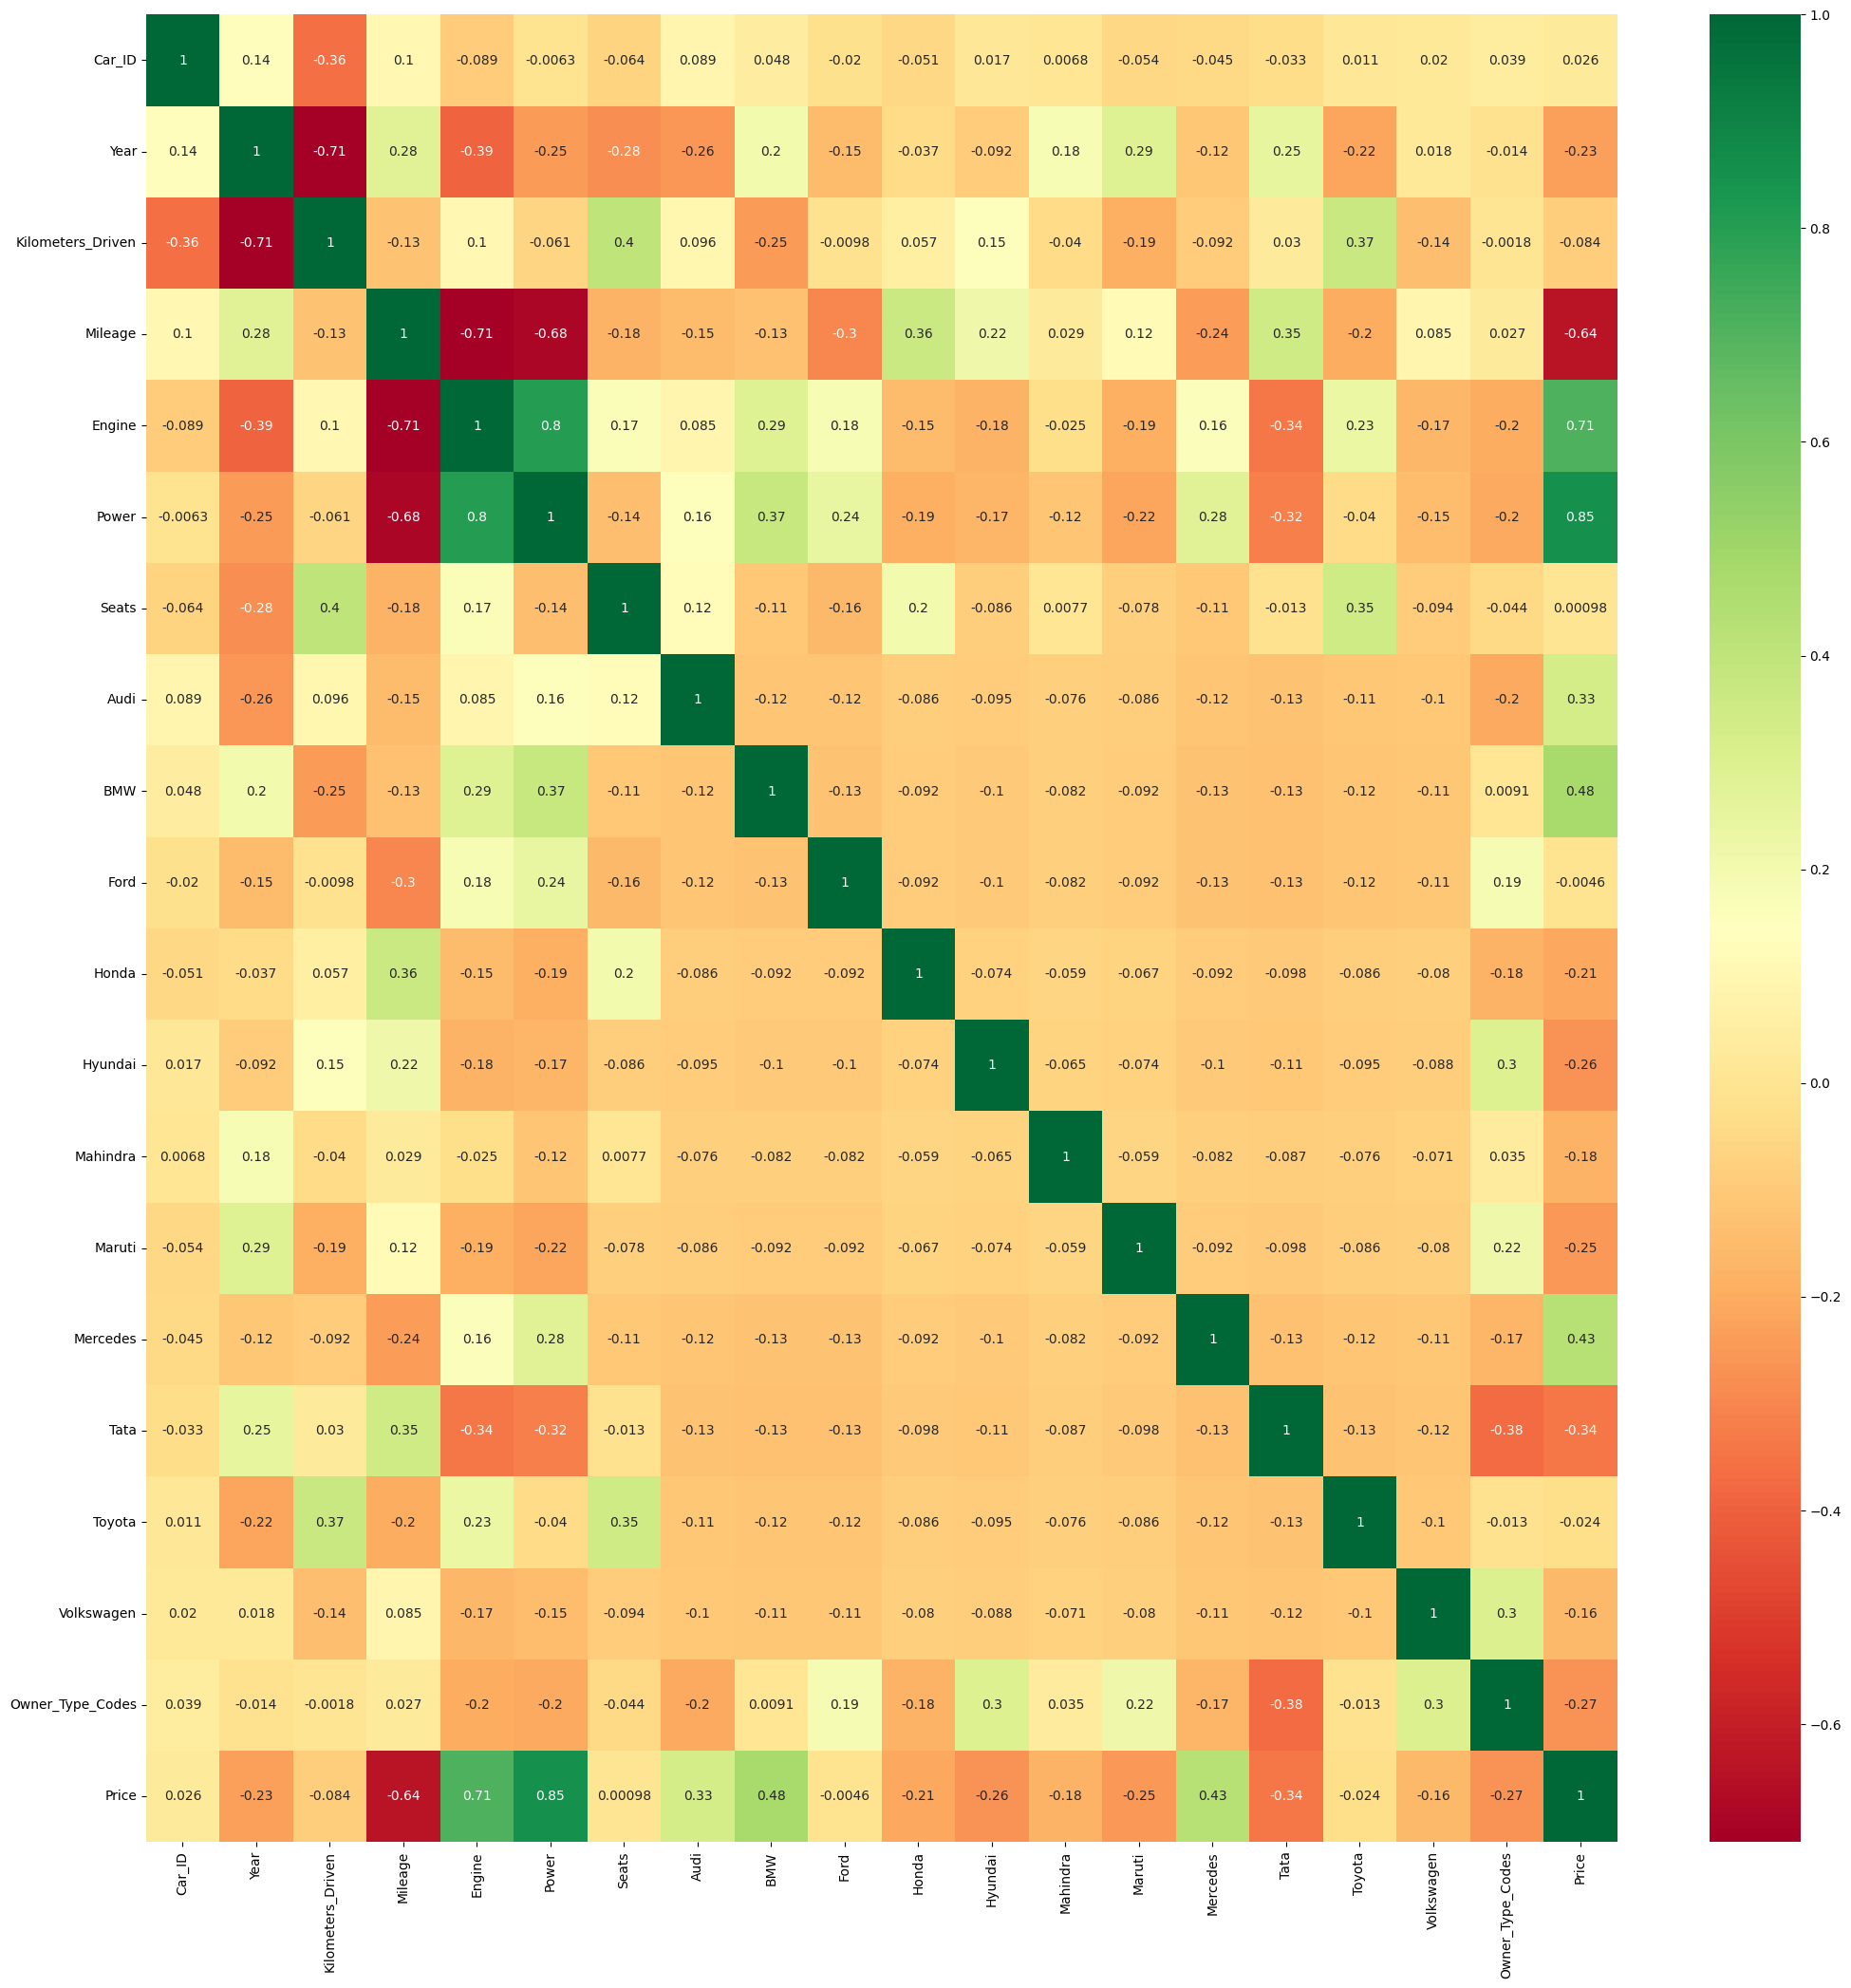

In [ ]:
#кореляційна матриця
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_XY_tr_n, annot = True, cmap = "RdYlGn", cbar = True)
plt.show()

###**Висновки**
Price корелюється більше ніж 0.5:
1. Milaege  -0.64;
2. Engine  0.71;
3. Power  0.85;



#Тренування лінійної регресії

Очищаємо дані від нечислових даних

In [ ]:
columns_to_be_deleted_tr = X_train.select_dtypes(exclude = 'number').columns.to_list()
X_train.drop(columns = columns_to_be_deleted_tr, inplace = True)

columns_to_be_deleted_te = X_test.select_dtypes(exclude = 'number').columns.to_list()
X_test.drop(columns = columns_to_be_deleted_te, inplace = True)

##Тренування лінійної регресії Scikit-learn

In [ ]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [ ]:
lin_reg

LinearRegression()

In [ ]:
lin_reg.fit(X_train, T_train)

LinearRegression()

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([ 3.67630735e+02,  2.64519308e+04,  6.83864362e-01, -8.30830816e+03,
         1.44374600e+02,  5.65242013e+03,  1.03951201e+05,  8.02157521e+05,
         9.05362938e+05, -2.45355353e+05, -4.14046781e+05, -4.38882661e+05,
        -4.95171050e+05, -4.06459207e+05,  9.16482144e+05, -4.26494761e+05,
        -9.52171736e+04, -1.02375617e+05, -7.56432427e+04]),
 -53396745.1782162)

In [ ]:
predictions_sklearn = lin_reg.predict(X_train)

#### Аналіз помилок

In [ ]:
model = LinearRegression().fit(X_train, T_train)
predictions_test = model.predict(X_test)
test_loss = mean_squared_error(T_test, predictions_test, squared=False)
print('Test Loss:', test_loss)

Test Loss: 248249.61361454346


In [ ]:
predictions_train = model.predict(X_train)
train_loss = mean_squared_error(T_train, predictions_train, squared=False)
print('Training Loss:', train_loss)

Training Loss: 252657.27724736722


In [ ]:
rmse_train = np.sqrt(train_loss)
rmse_test = np.sqrt(test_loss)

print(f"Root Mean Squared Error for train date: {rmse_train:.2f}")
print(f"Root Mean Squared Error for test date: {rmse_test:.2f}")


Root Mean Squared Error for train date: 502.65
Root Mean Squared Error for test date: 498.25


####Графік розсіювання передбачених та реальних даних

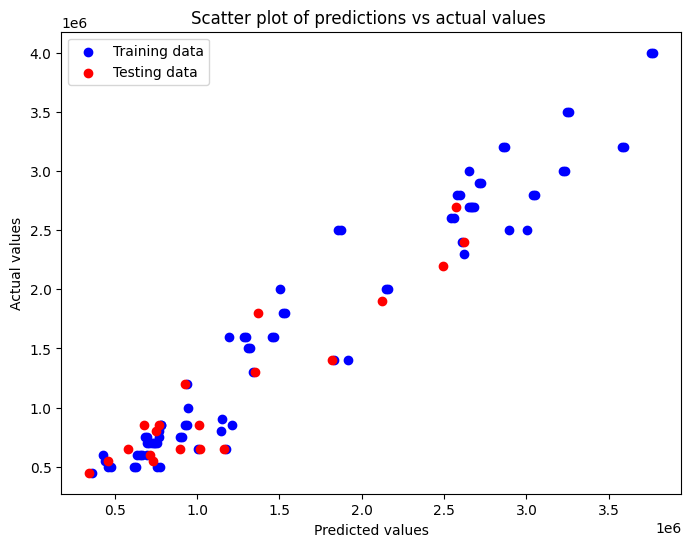

In [ ]:
# Побудова графіка розсіювання
plt.figure(figsize=(8, 6))
plt.scatter(predictions_train, T_train, color='blue', label='Training data')
plt.scatter(predictions_test, T_test, color='red', label='Testing data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of predictions vs actual values ')
plt.legend()
plt.show()

##Тренування лінійної регресії на масштабованих даних

Масштабуємо дані

In [ ]:
X_train.columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra',
       'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen',
       'Owner_Type_Codes'],
      dtype='object')

In [ ]:
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [ ]:
scaled_inputs_train = scaler.transform(X_train[numeric_cols])

In [ ]:
cat_cols = ['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes']
categorical_data = X_train[cat_cols].values

In [ ]:
X_train = np.concatenate((scaled_inputs_train, categorical_data), axis=1)

In [ ]:
scaled_inputs_test = scaler.transform(X_test[numeric_cols])

####Аналіз впливу ознак на передбачення ціни машини

In [ ]:
model = train_model_show_rmse(X_train, T_train)

Loss: 252808.49663965995


In [ ]:
column_names = numeric_cols + cat_cols

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=column_names)

In [ ]:
X_train_df.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,0.57,-0.69,0.27,-0.63,-0.23,-0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
1,-0.32,-0.04,-0.02,0.09,0.25,-0.30,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-0.32,-0.04,-0.60,0.11,0.91,-0.30,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-1.22,0.40,0.27,-0.48,-0.78,-0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
4,-1.22,-0.26,-1.48,0.12,0.91,-0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
18,1,1651881.50
13,Mercedes,912150.24
7,BMW,904873.79
6,Audi,803281.76
4,Power,463572.33
3,Engine,89881.05
5,Seats,78718.86
0,Year,24577.81
1,Kilometers_Driven,-2502.00
2,Mileage,-27590.86


###**Висновки**
- Найбільше як позитивно так і негативно впливає марка машини.
- Із технічних характеристик позитивно впливає: потужність двигуна, об'єм двигуна, кількість місць та рік випуску


##Тренуємо модель з statsmodels

In [ ]:
# Переіндексуємо обидва об'єкти
T_train = T_train.reset_index(drop=True)
X_train_df = X_train_df.reset_index(drop=True)

# Додаємо константу до X_train_df
X = sm.add_constant(X_train_df)

# Створення та навчання моделі
model = sm.OLS(T_train, X)
results = model.fit()
results.params

const               1514224.71
Year                  24577.81
Kilometers_Driven     -2502.00
Mileage              -27590.86
Engine                89881.05
Power                463572.33
Seats                 78718.86
Audi                 940938.55
BMW                 1042530.58
Ford                -109181.53
Honda               -279695.24
Hyundai             -299119.73
Mahindra            -353735.72
Maruti              -272855.53
Mercedes            1049807.03
Tata                -287510.73
Toyota                51797.62
Volkswagen            31249.42
Owner_Type_Codes     -74990.27
dtype: float64

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     57.35
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.15e-31
Time:                        11:28:26   Log-Likelihood:                -1108.7
No. Observations:                  80   AIC:                             2253.
Df Residuals:                      62   BIC:                             2296.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.514e+06   5.53e+0

**Ознаки є стат значущими на рівні значущості 0.05:**
- const;
- Power;
- Audi;
- BMW;
- Mersedes;

Від'ємно:
- Hundai;
- Mahindra;
- Tata

##Тренуємо лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими

In [ ]:
X_train_df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes'],
      dtype='object')

In [ ]:
X_train_p = X_train_df[['Power','Audi', 'BMW', 'Hyundai', 'Mahindra', 'Mercedes', 'Tata']]

In [ ]:
T_train = T_train.reset_index(drop=True)
X_train_p = X_train_p.reset_index(drop=True)

# Додаємо константу до X_train_df
X = sm.add_constant(X_train_p)

# Створення та навчання моделі
model = sm.OLS(T_train, X)
results = model.fit()
results.params

const      1383014.15
Power       564396.03
Audi       1051071.19
BMW        1092913.96
Hyundai    -319144.08
Mahindra   -217665.49
Mercedes   1105144.86
Tata       -164670.46
dtype: float64

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.95e-36
Time:                        11:28:27   Log-Likelihood:                -1122.0
No. Observations:                  80   AIC:                             2260.
Df Residuals:                      72   BIC:                             2279.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.383e+06   5.45e+04     25.359      0.0

R2:
- всі дані - 0.940 ;
- лише статзначимі -0.917;

Adj.:
- всі дані - 0.920;
- лише статзначимі - 0.909;


##Тренуємо лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`,з помʼякшеним критерієм відбору ознак.

In [ ]:
X_train_25 = X_train_df[['Engine', 'Power', 'Seats', 'Audi', 'BMW', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata']]

In [ ]:
T_train = T_train.reset_index(drop=True)
X_train_25 = X_train_25.reset_index(drop=True)

# Додаємо константу до X_train_df
X = sm.add_constant(X_train_25)

# Створення та навчання моделі
model = sm.OLS(T_train, X)
results = model.fit()
results.params

const      1424604.10
Engine      110555.73
Power       457438.47
Seats        84473.03
Audi       1000290.56
BMW        1099760.44
Honda      -244165.15
Hyundai    -328563.87
Mahindra   -305093.30
Maruti     -244705.66
Mercedes   1122676.74
Tata       -193647.64
dtype: float64

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     91.61
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.68e-36
Time:                        11:28:27   Log-Likelihood:                -1111.0
No. Observations:                  80   AIC:                             2246.
Df Residuals:                      68   BIC:                             2275.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.425e+06   5.89e+04     24.179      0.0

R2:
- всі дані - 0.940 ;
- лише статзначимі -0.917;
- статзначимість 0.25 - 0.937;

Adj.:
- всі дані - 0.920;
- лише статзначимі - 0.909;
- статзначимість 0.25 - 0.927

BIC:
- всі дані - 2296;
- лише статзначимі - 2279;
- статзначимість 0.25 - 2275



#**Висновки**
Я б залишила для використання модель з даними з статзначимостю 0,25 оскільки:
- найвищий коефіцієнт Adj;
- середній показник R2;
- виправданість використианих параметрів найкраща.